# Lekce 2

## Feature engineering a práce s datem a časem

To, co při práci v pandas označujeme jako sloupce nebo série, je v machine learningu a data science označované slovem "features". Pokud získáme nějaký dataset, často zjistíme, že je s features potřeba pracovat. Takovým úpravám říkáme feature engineering. V rámci kurzu se seznámíme s několika různými technikami feature engineering. V této lekci si ukážeme, jak si poradit s datem a časem.

V minulé lekci jsme viděli, že časový údaj (například měsíc nebo den v týdnu) může být důležitý pro hledání a vysvětlování vztahů mezi jednotlivými sloupci (features) datasetu. V použité datasetu již byly tyto sloupce vytvořeny, v řadě jiných datasetů je ale nemáme. Proto si nyní ukážeme, jak tyto features získat a použít. Situace je o něco složitější než ve světě SQL. Tam totiž nastavíme sloupci type `date` nebo `datetime` a pak pouze používáme funkce podle naší potřeby. Pokud data získáváme ze souborů CSV nebo JSON, pandas data načte sloupce jako řetězce a musíme je nejprve převést na typ `datetime`.

Budeme pracovat s daty v souboru [invoices.csv](invoices.csv).

In [33]:
import pandas as pd

data = pd.read_csv("invoices.csv")
data.head()

,invoice_date,customer,amount,payment_date
0,01. 05. 2016,Campos PLC,29366,25. 06. 2016
1,10. 05. 2016,"Garcia, Hamilton and Carr",61145,16. 07. 2016
2,20. 05. 2016,"Garcia, Hamilton and Carr",92659,26. 07. 2016
3,25. 05. 2016,"Nguyen, Harrell and Lee",40076,05. 08. 2016
4,04. 06. 2016,"Garcia, Hamilton and Carr",54854,06. 08. 2016


První dva sloupce mají obecný typ `object`, `pandas` tedy nerozpoznal, že v prvním sloupci je datum. To je škoda, protože nám to neumožní s datem pracovat. 

In [34]:
data.dtypes

invoice_date    object
customer        object
amount           int64
payment_date    object
dtype: object

### Převod na datum a čas

Můžeme sloupec na typ `datetime` převést. K převodu použijeme funkci `to_datetime`, které předáme sloupec `invoice_date` a výstup uložíme do sloupce `invoice_date_converted`.

U dat zapsaných jako text ale platí, že mohou být zapsány v různých formátech, obvykle dle zvyklostí prostředí, kde data vznikla. Například my zapisujeme data ve formátu den. měsíc. rok, Američané zase píši měsíc/den/rok. Dále existuje mezinárodní formát rok-měsíc-den. Abychom si toto ujasnili, můžeme přesně zapsat formát data nebo využít parametry `dayfirst` a `yearfirst`. Jedná se o parametry typu `bool` (pravdivostní hodnota). Pokud nastavíme `dayfirst=True`, pandas bude očekávat jako první den v měsíci (a nikoli rok).

Převedený sloupec se pak zobrazuje v mezinárodním formátu.

In [35]:
data["invoice_date_converted"] = pd.to_datetime(invoices["invoice_date"], dayfirst=True)
data.head()

,invoice_date,customer,amount,payment_date,invoice_date_converted
0,01. 05. 2016,Campos PLC,29366,25. 06. 2016,2016-05-01
1,10. 05. 2016,"Garcia, Hamilton and Carr",61145,16. 07. 2016,2016-05-10
2,20. 05. 2016,"Garcia, Hamilton and Carr",92659,26. 07. 2016,2016-05-20
3,25. 05. 2016,"Nguyen, Harrell and Lee",40076,05. 08. 2016,2016-05-25
4,04. 06. 2016,"Garcia, Hamilton and Carr",54854,06. 08. 2016,2016-06-04


Sloupec má `invoice_date_converted` typ hodnoty `datetime64[ns]`.

In [36]:
data.dtypes

invoice_date                      object
customer                          object
amount                             int64
payment_date                      object
invoice_date_converted    datetime64[ns]
dtype: object

Uvažujme nyní pro zjednodušení, že každá faktura má splatnost 60 dní. Poté můžeme dopočítat datum, ke kterému měla být faktura zaplacena. K přičtení použijeme klasické znaménku `+`, musíme ale přičíst typ `Timedelta`

In [37]:
data["due_date"] = data["invoice_date_converted"] + pd.Timedelta("P60D")
data.head()

,invoice_date,customer,amount,payment_date,invoice_date_converted,due_date
0,01. 05. 2016,Campos PLC,29366,25. 06. 2016,2016-05-01,2016-06-30
1,10. 05. 2016,"Garcia, Hamilton and Carr",61145,16. 07. 2016,2016-05-10,2016-07-09
2,20. 05. 2016,"Garcia, Hamilton and Carr",92659,26. 07. 2016,2016-05-20,2016-07-19
3,25. 05. 2016,"Nguyen, Harrell and Lee",40076,05. 08. 2016,2016-05-25,2016-07-24
4,04. 06. 2016,"Garcia, Hamilton and Carr",54854,06. 08. 2016,2016-06-04,2016-08-03


In [38]:
data["payment_date_converted"] = pd.to_datetime(data["payment_date"], dayfirst=True)

Pojďme nyní roztřídit faktury na ty, které byly zaplaceny včas, a na ty, které byly zaplaceny pozdě. Přidáme sloupec `status`, který bude obsahovat texty `in time` a `late`. Tím data roztřídíme do dvou kategorií. Úkolem v rámci data science by pak například mohla být predikce, jestli bude faktura zaplacená včas.

In [39]:
import numpy
data["status"] = numpy.where(data["payment_date_converted"] < data["due_date"], "in time", "late")
data.head()

,invoice_date,customer,amount,payment_date,invoice_date_converted,due_date,payment_date_converted,status
0,01. 05. 2016,Campos PLC,29366,25. 06. 2016,2016-05-01,2016-06-30,2016-06-25,in time
1,10. 05. 2016,"Garcia, Hamilton and Carr",61145,16. 07. 2016,2016-05-10,2016-07-09,2016-07-16,late
2,20. 05. 2016,"Garcia, Hamilton and Carr",92659,26. 07. 2016,2016-05-20,2016-07-19,2016-07-26,late
3,25. 05. 2016,"Nguyen, Harrell and Lee",40076,05. 08. 2016,2016-05-25,2016-07-24,2016-08-05,late
4,04. 06. 2016,"Garcia, Hamilton and Carr",54854,06. 08. 2016,2016-06-04,2016-08-03,2016-08-06,late


Pokud máme k dipozici dvě data, můžeme mezi nimi též spočítat rozdíl. V minulém datasetu jsme například měli spočítaný rozdíl mezi dvěma daty - datem vytvoření rezervace ubytování a prvním dnem ubytování. Výsledkem je pak typ `Datetime`, který jsme již poznali v předchozím kroku.

My si dopočítáme, po kolika dnech od vydání faktury byla faktura zaplacena. I toto je hodnota, kterou bychom mohli predikovat. Tentokrát bychom ovšem řešili nikoli úlohu zařazení údaje do jedné ze dvou skupin, ale odhad čísla. Takovým úlohám se často říká regresní úlohy, regrese je pak i jeden z typu způsobu jejích řešení (ačkoli to není zcela přesné, existují i typy regrese, které řeší klasifikaci).

In [40]:
data["paid_in"] = data["payment_date_converted"] - data["invoice_date_converted"]
data.head()

,invoice_date,customer,amount,payment_date,invoice_date_converted,due_date,payment_date_converted,status,paid_in
0,01. 05. 2016,Campos PLC,29366,25. 06. 2016,2016-05-01,2016-06-30,2016-06-25,in time,55 days
1,10. 05. 2016,"Garcia, Hamilton and Carr",61145,16. 07. 2016,2016-05-10,2016-07-09,2016-07-16,late,67 days
2,20. 05. 2016,"Garcia, Hamilton and Carr",92659,26. 07. 2016,2016-05-20,2016-07-19,2016-07-26,late,67 days
3,25. 05. 2016,"Nguyen, Harrell and Lee",40076,05. 08. 2016,2016-05-25,2016-07-24,2016-08-05,late,72 days
4,04. 06. 2016,"Garcia, Hamilton and Carr",54854,06. 08. 2016,2016-06-04,2016-08-03,2016-08-06,late,63 days


Nakonec si ukážeme extrakci z data. Ta je poměrně jednoduchá. Pro vlastnosti spojené s datem a časem musíme psát nejprve `.dt` a poté vlastnost, kterou chceme získat (opět s tečkou). Níže například čteme měsíc a den.

In [41]:
data["invoice_date_converted_month"] = data["invoice_date_converted"].dt.month
data["invoice_date_converted_day"] = data["invoice_date_converted"].dt.day
data.head()

,invoice_date,customer,amount,payment_date,invoice_date_converted,due_date,payment_date_converted,status,paid_in,invoice_date_converted_month,invoice_date_converted_day
0,01. 05. 2016,Campos PLC,29366,25. 06. 2016,2016-05-01,2016-06-30,2016-06-25,in time,55 days,5,1
1,10. 05. 2016,"Garcia, Hamilton and Carr",61145,16. 07. 2016,2016-05-10,2016-07-09,2016-07-16,late,67 days,5,10
2,20. 05. 2016,"Garcia, Hamilton and Carr",92659,26. 07. 2016,2016-05-20,2016-07-19,2016-07-26,late,67 days,5,20
3,25. 05. 2016,"Nguyen, Harrell and Lee",40076,05. 08. 2016,2016-05-25,2016-07-24,2016-08-05,late,72 days,5,25
4,04. 06. 2016,"Garcia, Hamilton and Carr",54854,06. 08. 2016,2016-06-04,2016-08-03,2016-08-06,late,63 days,6,4


Další často používané vlastnosti jsou například

- `year`,
- `hour`,
- `minute`,
- `second`.

## Kontingenční tabulky (pivot)

Pojem `pivot` obvykle překládáme jako kontingenční tabulka. Jde o tabulku, která porovnává dvě různé tzv. kategorie - jedna kategorie je použitá pro sloupce a druhá pro řádky. Pomocí kontingenční tabulky můžeme například porovnat tržby obchodních manažerů v jednotlivých zemích.

Pro sestavení kontingenční tabulky použijeme metodu `pivot_table`. Potřebujeme nastavit následující parametry:
- Sloupec, který použijeme pro sloupce sloupcovou a řádkovou dimenzi.
- Sloupec, který využijeme pro hodnoty, a agregační funkci.

Pokud chceme porovnat tržby sales manažerů pro jednotlivé země, použijeme sloupce `sales_manager` a `country` pro sloupce a řádky. Do "vnitřku" tabulky vložíme hodnoty sloupce `contract_value` a protože chceme vidět celkovou hodnotu, jako funkci použijeme `numpy.sum`.

Abychom si výsledky výpočtů trochu zpřehlednili, můžeme vydělit hodnotu sloupce `contract_value` milionem.

In [42]:
import pandas

data = pandas.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nyní si zkusíme zobrazit stejnou informaci pomocí kontingenční tabulky, použijeme tedy funkci `pivot_table`.

Pozor, nepleť si funkci `pivot_table` a `pivot`! Funkci `pivot` též vytváří kontingenční tabulku, provádí však jen polovinu toho, co `pivot_table`. Přeskládá hodnoty v tabulce, ale neprovádí agregaci. Lze ji tedy použít pouze v případě, že pro každou kombinaci hodnot sloupců máš maximálně jeden záznam.

Nastavujeme následující parametry:
- `data` = tabulka, která obsahuje zdrojová data,
- `index` = sloupec sloužící jako řádková dimenze,
- `columns` = sloupec sloužící jako sloupcová dimenze,
- `values` = sloupec, ze kterého se počítají hodnoty uvnitř tabulky,
- `aggfunc` = funkce, která je použitá k výpočtu hodnot uvnitř tabulky.

In [43]:
data_pivot = pandas.pivot_table(data=data, values="Name", index="Sex", columns="Survived", aggfunc=len)
data_pivot

Survived,0,1
Sex,,
female,81,233
male,468,109


Často je zajímavé zobrazit si i celkový součet pro řádky a sloupce, ten získáme pomocí parametru `margins`.

In [32]:
data_pivot = pandas.pivot_table(data, values="Name", index="Sex", columns="Survived", aggfunc=len, fill_value=0, margins=True)
data_pivot

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Relativní hodnoty v kontingenční tabulce

Občas mohou být zajímavější relativní hodnoty než absolutní. Uvažujme například situaci, kdy chceme vidět, kolik procent celkových tržeb v jednotlivých zemích zajistili jednotliví obchodníci. Abychom tuto informaci získali, vydělíme tržby jednotlivých obchodníků v jednotlivých zemích tržbami v celé zemi. 

Vydělení provedeme pomocí metody `div`. Výpočet spočívá v tom, že vydělíme hodnoty v řádcích tabulky součtem příslušného řádku. Proto je nutné vytvořit kontingenční tabulku s nastavením parametru `margins=True`.

In [44]:
data_pivot = pandas.pivot_table(data, values="Name", index="Sex", columns="Survived", aggfunc=len, fill_value=0, margins=True)
data_pivot = data_pivot.div(data_pivot.iloc[:,-1], axis=0)
data_pivot

Survived,0,1,All
Sex,,,
female,0.257962,0.742038,1.0
male,0.811092,0.188908,1.0
All,0.616162,0.383838,1.0


## Skupiny

Data často můžeme rozdělit do skupin (kategorií). Například můžeme rozdělit cestující na Titanicu do několika věkových skupin.

| Age Group                      | Age Range   |
|--------------------------------|-------------|
| Children                       | 0-12        |
| Teenagers                      | 13-18       |
| Adults                         | 19-60       |
| Seniors                        | 60+         |


Rozdělení můžeme provést pomocí funkce `cut`. Jako první parametr funkce `cut` zadáme sérii, ze které skupiny určujeme. Druhá skupina jsou hranice, které dělí jednotlivé skupiny. Protože máme 4 skupiny, potřebujeme 5 hranic. Jako poslední hranici můžeme zadat výraz `inf`, což je zkratka anglického infinity - nekonečno. Řetězec `"inf"` převedeme na desetinné číslo pomocí funkce `float()`. Jako parametr `labels` přidáme seznam s názvy skupin.

In [49]:
bins = [0, 12, 18, 59, float('inf')]
labels = ['Children', 'Teenagers', 'Adults', 'Seniors']

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adults


## Dobrovolné čtení na doma

### Teplotní mapa

I kontingenční tabulku můžeme prezentovat jako graf, hodí se například graf typu teplotní mapa (Heat Map). Ten vypadá podobně jako kontingenční tabulka, hodnoty jsou ale podbarveny barevnou škálou. Vygenerování grafu modulem `matplotlib` je poměrně náročné, proto je v tomto případně lepší použít "nadstavbu", kterou je modul `seaborn`. Před spuštěním program je potřeba modul nainstalovat příkazem

```
pip install seaborn
```

<Axes: xlabel='Survived', ylabel='Sex'>

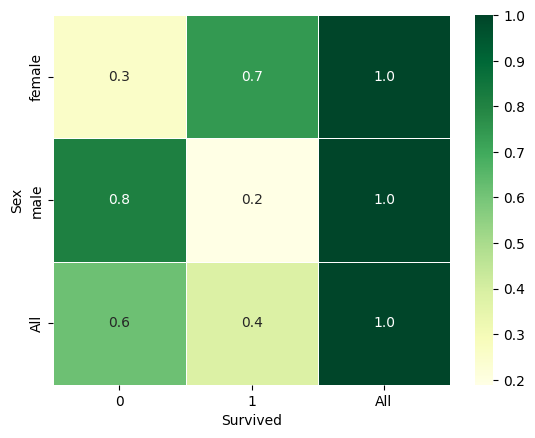

In [47]:
import seaborn as sns
sns.heatmap(data_pivot, annot=True, fmt=".1f", linewidths=.5, cmap="YlGn")

# Cvičení

## Hotely a pivot tabulky

Vrať se k datům o rezervacích ubytování na serveru [hotel_bookings.csv](hotel_bookings.csv). Minule jsme si zobrazovali závislosti pomocí grafů, nyní to zkusme s využitím kontingenční tabulky.

Vytvoř kontingenční tabulku, která zobrazuje závislost mezi typem hotelu (sloupec `hotel`) a tím, jestli byla rezervace zrušena (sloupec `is_canceled`). Tabulku vytvoř s počty rezervací i s procentuálním počtem zrušených a nezrušených rezervací.

## Titanic a další pivot tabulky

Vytvoř další kontingenční tabulku, která porovná závislost mezi třídou (sloupec `Pclass`), ve které cestoval, a tím, jestli přežil. Zkus spočítat relativní počty u jednotlivých tabulek.

## Bonus: Doprava

Stáhni si data ze souboru [traffic.csv](traffic.csv), který zobrazuje počet aut v hodinových intervalech na čtyřech různých křižovatkách.

- Přidej sloupec, který bude obsahovat měsíc, den v týdnu a hodinu, kdy měření probíhalo.
- Vytvoř kontingenční tabulku, která zobrazuje průměrný počet projetých aut v závislosti na dni v týdnu a hodině.
- Tato tabulka je poměrně velká, zkusme tedy rozdělit den na několik částí:
  - noc (22 hodin až 5 hodin),
  - ranní špička (6 hodin až 9 hodin),
  - poledne (10 hodin až 13 hodin),
  - odpolední špička (14 hodin až 16 hodin),
  - večer (17 hodin až 21 hodin).
- Dny v týdnu rozděl na pracovní dny a víkend.
- Nyní zobraz průměrné aut v jednotlivých částech dne a typec dne.